In [1]:

import geopandas as gpd
# Replace 'path/to/your/shapefile.shp' with the actual path to your shapefile
shapefile_path = 'E:\\CEO\\Code\\pypsa-eur\\Electric_Power_Transmission_Lines_TX_20221214\\Electric_Power_Transmission_Lines_TX_20221214.shp'

# Read the shapefile using geopandas
gdf = gpd.read_file(shapefile_path)

# Now 'gdf' is a GeoDataFrame containing the data from the shapefile
# You can access and manipulate the geospatial data as needed


In [3]:
import pyproj

# Replace 'your_epsg_code' with the EPSG code of the projected coordinate system
# For example, EPSG:3857 is commonly used for Web Mercator
projected_epsg = '3857'

# Create a projection object for the projected coordinate system
projected_proj = pyproj.Proj(f'epsg:{projected_epsg}', preserve_units=True)

# Example coordinates in the projected coordinate system
x = gdf['geometry'][0].xy[0]
y = gdf['geometry'][0].xy[1]

# Convert the coordinates to latitude and longitude
lon, lat = projected_proj(x, y, inverse=True)

print(f'Longitude: {lon}, Latitude: {lat}')


Longitude: array('d', [-94.01198687420124, -94.01502900004628, -94.01651000035292, -94.01790200007278, -94.02716300003472, -94.02901000003926, -94.03510400024682, -94.03840099969756]), Latitude: array('d', [31.975211936842697, 31.97443600014992, 31.97406099985714, 31.97341900029208, 31.971071999775273, 31.97063400010547, 31.963243999791672, 31.959767000194915])


In [ ]:
import folium
x,y=projected_proj(gdf['geometry'][0].xy[0][0],gdf['geometry'][0].xy[1][0],inverse=True)

map_center = [y,x]
mymap = folium.Map(location=map_center, zoom_start=6)
coords=[]
for geom in gdf['geometry']:
    if geom.geom_type == 'LineString':
        coords=[]
        coords.append(projected_proj([item[0] for item in geom.coords[:]],
                                     [item[1] for item in geom.coords[:]],inverse=True))
        folium.PolyLine(locations=list(zip(coords[0][1], coords[0][0])), color='blue').add_to(mymap)
    elif geom.geom_type == 'MultiLineString':
        for line in geom.geoms:
            coords=[]
            coords.append(projected_proj([item[0] for item in line.coords[:]],
                                     [item[1] for item in line.coords[:]],inverse=True))
            folium.PolyLine(locations=list(zip(coords[0][1], coords[0][0])), color='blue').add_to(mymap)

mymap

In [ ]:
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(mymap)

import pandas as pd

def read_excel_with_custom_header(file_path, sheet_name, header_row):
    try:
        df = pd.read_excel(file_path, sheet_name=sheet_name, header=header_row - 1)
        return df
    except Exception as e:
        print("Error occurred:", e)
        return None

# Example usage:

header_row = 3  # The row number (1-based) where the column names are located


file_path = 'may_generator2023.xlsx'
sheet_name = 'Operating'  # Replace 'Sheet1' with the name of the sheet you want to read

df = read_excel_with_custom_header(file_path, sheet_name, header_row)
TX_df=df[df['Plant State']=='TX']
TX_df.reset_index(drop=True, inplace=True)

colors_list = [
    "blue", "red", "green", "orange", "purple", "yellow", "cyan", "magenta",
    "lime", "pink", "teal", "brown", "olive", "navy", "gray", "black",
    "salmon", "lightgreen"
]

technologies = [
    'Natural Gas Fired Combustion Turbine', 'Conventional Steam Coal',
    'Conventional Hydroelectric', 'Natural Gas Fired Combined Cycle',
    'Natural Gas Steam Turbine', 'Petroleum Liquids',
    'Natural Gas Internal Combustion Engine', 'Nuclear', 'Batteries',
    'Other Gases', 'Petroleum Coke', 'Wood/Wood Waste Biomass',
    'All Other', 'Other Waste Biomass', 'Onshore Wind Turbine',
    'Landfill Gas', 'Solar Photovoltaic', 'Flywheels'
]
technology_color_map = dict(zip(technologies, colors_list))

# Add a new column 'color' to TX_df and assign colors based on the 'technology' column
TX_df['color'] = TX_df['Technology'].map(technology_color_map)

for i in range(0, len(TX_df)):
    folium.Marker(
        location=[TX_df['Latitude'][i], TX_df['Longitude'][i]],
        popup=TX_df["Technology"][i],
        icon=folium.Icon(color=TX_df["color"][i], icon_scale=0.5)  # Set the icon scale to 0.5
    ).add_to(marker_cluster)  # Add the marker to the marker cluster layer

# Display the map
mymap


In [86]:
mymap.save("PyPSA_TX.html")


In [92]:
TX_df.columns

Index(['Entity ID', 'Entity Name', 'Plant ID', 'Plant Name', 'Google Map',
       'Bing Map', 'Plant State', 'County', 'Balancing Authority Code',
       'Sector', 'Generator ID', 'Unit Code', 'Nameplate Capacity (MW)',
       'Net Summer Capacity (MW)', 'Net Winter Capacity (MW)', 'Technology',
       'Energy Source Code', 'Prime Mover Code', 'Operating Month',
       'Operating Year', 'Planned Retirement Month', 'Planned Retirement Year',
       'Status', 'Nameplate Energy Capacity (MWh)', 'DC Net Capacity (MW)',
       'Planned Derate Year', 'Planned Derate Month',
       'Planned Derate of Summer Capacity (MW)', 'Planned Uprate Year',
       'Planned Uprate Month', 'Planned Uprate of Summer Capacity (MW)',
       'Latitude', 'Longitude', 'color'],
      dtype='object')

In [91]:
gdf

,OBJECTID,ID,TYPE,STATUS,NAICS_CODE,NAICS_DESC,SOURCE,SOURCEDATE,VAL_METHOD,VAL_DATE,OWNER,VOLTAGE,VOLT_CLASS,INFERRED,SUB_1,SUB_2,SHAPE__Len,GlobalID,Shape_Leng,geometry
0,6805,149706,OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,IMAGERY,2014-08-22,IMAGERY,2019-03-26,NOT AVAILABLE,-999999.0,100-161,Y,LOGANSPORT,TAP161924,4993.409208,57095af0-266a-45d5-a46b-9871b03abe9b,3760.459719,"LINESTRING (-10465366.507 3760057.248, -104657..."
1,7883,155704,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, EIA 860",2015-05-05,IMAGERY/OTHER,2016-08-25,NOT AVAILABLE,345.0,345,N,UNKNOWN123543,NORTHWEST TEXARKANA,57327.198533,32f76db9-ae29-4326-ae27-9e84e86adbb9,14629.079128,"LINESTRING (-10483631.493 3960302.666, -104835..."
2,7884,155706,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, OpenStreetMap, http://sppoasis.spp.or...",2015-06-15,IMAGERY,2016-02-12,PUBLIC SERVICE CO OF OKLAHOMA,345.0,345,N,VALLIANT,UNKNOWN306337,84028.210629,bdbfb25a-581a-455e-9920-d089df504f6f,43965.955722,"LINESTRING (-10544170.360 3953088.660, -105441..."
3,7885,155715,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,OpenStreetMap,2015-06-15,IMAGERY,2015-07-28,PUBLIC SERVICE CO OF OKLAHOMA,138.0,100-161,N,UNKNOWN118741,UNKNOWN306130,66612.710410,21665e95-6821-4e9b-83a9-24130193371c,28353.623836,"LINESTRING (-11057500.809 4056068.219, -110574..."
4,7886,155720,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, OpenStreetMap, EIA 861",2014-08-28,IMAGERY,2017-03-22,SOUTHWESTERN ELECTRIC POWER CO,138.0,100-161,Y,LIEBERMAN 138KV,UNKNOWN306182,51684.382860,99f83631-4702-42e8-af6b-4a60b95732ca,37367.611813,"LINESTRING (-10505281.144 3866170.648, -105053..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7016,93982,313737,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,IMAGERY,2018-09-18,IMAGERY/OTHER,2018-09-18,SOUTHWESTERN PUBLIC SERVICE CO.,69.0,UNDER 100,N,TAP305159,HALE CO,8793.439269,9570739e-afd7-4166-8513-520c2a39dd44,8793.439249,"LINESTRING (-11337284.375 4045391.348, -113372..."
7017,93983,313738,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,"IMAGERY, DVOF",2018-08-27,IMAGERY/OTHER,2018-08-27,EL PASO ELECTRIC CO.,69.0,UNDER 100,N,FABENS,ALAMO,19712.986465,6e1f2935-406b-4438-b616-c4c3caa45375,19712.986372,"LINESTRING (-11817657.362 3698525.788, -118177..."
7018,93984,313739,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,IMAGERY,2018-09-07,IMAGERY/OTHER,2022-03-22,AEP TEXAS NORTH CO.,69.0,UNDER 100,N,UNKNOWN301434,UNKNOWN302807,4015.651835,a00225b7-b5db-48b2-8fcc-cfe58b60de29,4015.651858,"LINESTRING (-11113582.563 3817850.342, -111136..."
7019,93985,313740,AC; OVERHEAD,IN SERVICE,221121,ELECTRIC BULK POWER TRANSMISSION AND CONTROL,IMAGERY,2018-09-28,IMAGERY/OTHER,2018-09-28,ONCOR ELECTRIC DELIVERY CO.,69.0,UNDER 100,N,UNKNOWN302926,UNKNOWN303054,16460.858311,58ccf57a-9523-4d22-9db5-2f071d5bc0b7,16460.858348,"LINESTRING (-11277593.837 3803269.378, -112776..."


In [36]:
import geopandas as gpd
import networkx as nx
from shapely.geometry import Point, LineString, MultiLineString

# Assuming 'gdf' is your GeoDataFrame containing LineString and MultiLineString geometries
# Make sure to replace it with the actual name of your DataFrame

# Step 1: Extract Nodes
nodes = []
for geom in gdf['geometry']:
    if isinstance(geom, LineString):
        nodes.extend(geom.coords)
    elif isinstance(geom, MultiLineString):
        for line in geom.geoms:
            nodes.extend(line.coords)

# Step 2: Create Edges
edges = []
for geom in gdf['geometry']:
    if isinstance(geom, LineString):
        nodes_coords = geom.coords
        for i in range(len(nodes_coords) - 1):
            edges.append((nodes_coords[i], nodes_coords[i + 1]))
    elif isinstance(geom, MultiLineString):
        for line in geom.geoms:
            nodes_coords = line.coords
            for i in range(len(nodes_coords) - 1):
                edges.append((nodes_coords[i], nodes_coords[i + 1]))

# Step 3: Construct Network
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Now you have a NetworkX graph 'G' representing the network with nodes and edges


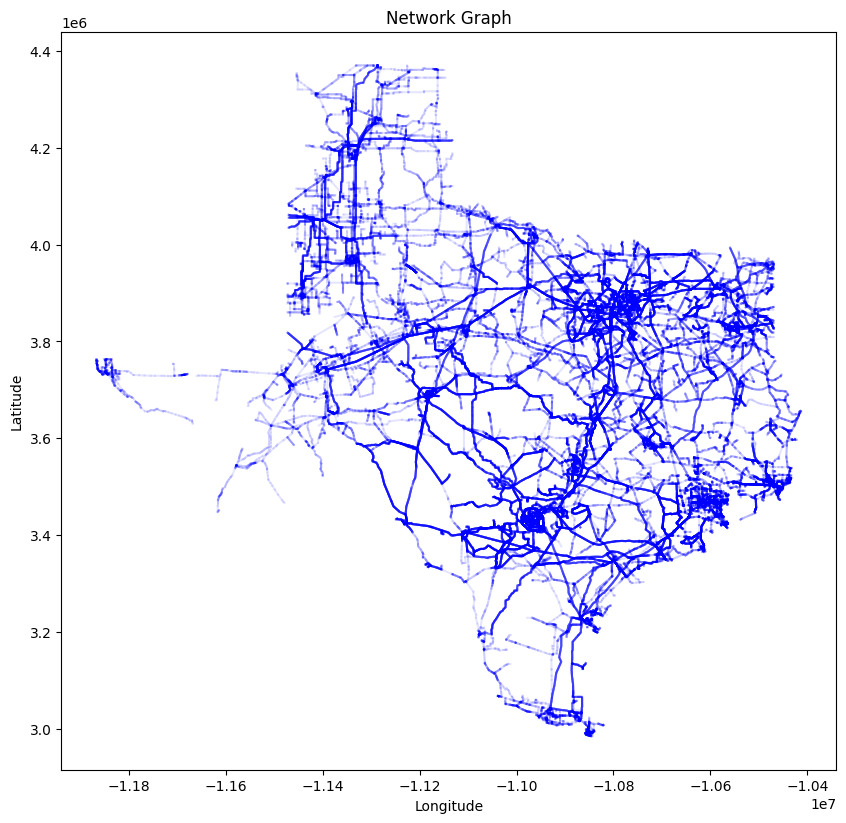

In [39]:
import matplotlib.pyplot as plt

# Plot the NetworkX graph using GeoPandas and Matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='none', edgecolor='red')

for u, v in G.edges():
    x = [u[0], v[0]]
    y = [u[1], v[1]]
    ax.plot(x, y, color='blue', alpha=0.1)

plt.title("Network Graph")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

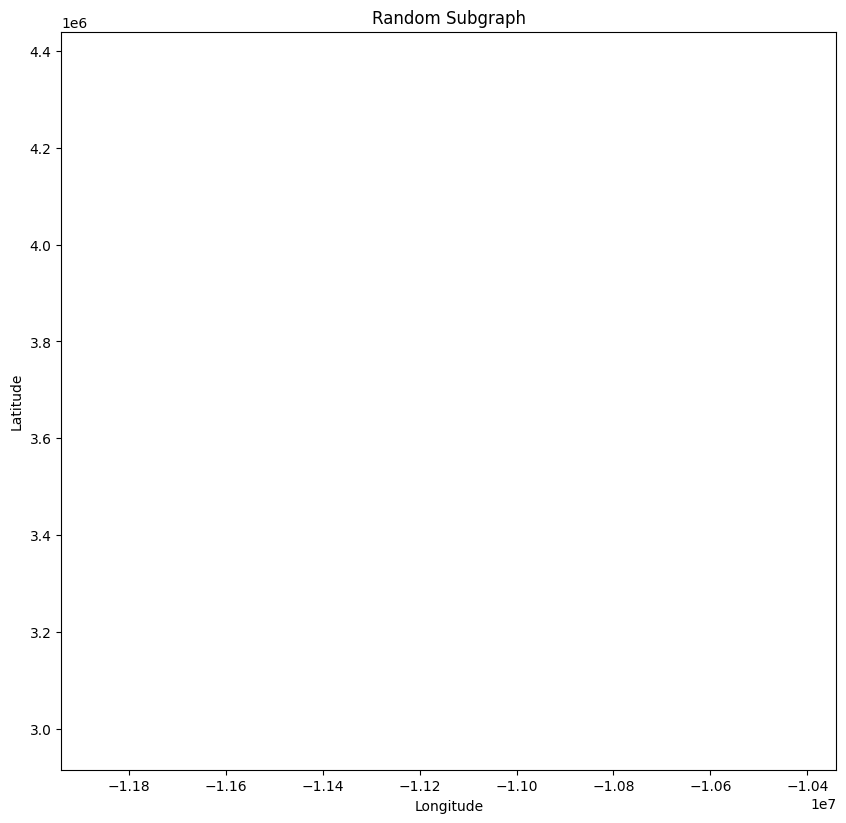

In [42]:
# Step 4: Randomly select 200 nodes
import random
all_nodes = list(G.nodes())

# Randomly select 200 nodes from the list
random_nodes = random.sample(all_nodes, 200)

# Step 5: Create a subgraph of selected nodes and their edges
subgraph = G.subgraph(random_nodes)

# Plot the subgraph using GeoPandas and Matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='none', edgecolor='black')

for u, v in subgraph.edges():
    x = [u[0], v[0]]
    y = [u[1], v[1]]
    ax.plot(x, y, color='blue', alpha=0.5)

plt.title("Random Subgraph")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [95]:
import pypsa

# marginal costs in EUR/MWh
marginal_costs = {"Wind": 0, "Hydro": 0, "Coal": 30, "Gas": 60, "Oil": 80}

# power plant capacities (nominal powers in MW) in each country (not necessarily realistic)
power_plant_p_nom = {
    "South Africa": {"Coal": 35000, "Wind": 3000, "Gas": 8000, "Oil": 2000},
    "Mozambique": {
        "Hydro": 1200,
    },
    "Swaziland": {
        "Hydro": 600,
    },
}

# transmission capacities in MW (not necessarily realistic)
transmission = {
    "South Africa": {"Mozambique": 500, "Swaziland": 250},
    "Mozambique": {"Swaziland": 100},
}

# country electrical loads in MW (not necessarily realistic)
loads = {"South Africa": 42000, "Mozambique": 650, "Swaziland": 250}

In [96]:
country = "South Africa"

network = pypsa.Network()

network.add("Bus", country)

for tech in power_plant_p_nom[country]:
    network.add(
        "Generator",
        "{} {}".format(country, tech),
        bus=country,
        p_nom=power_plant_p_nom[country][tech],
        marginal_cost=marginal_costs[tech],
    )


network.add("Load", "{} load".format(country), bus=country, p_set=loads[country])

In [97]:
network.optimize()


<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast

INFO:linopy.model: Solve linear problem using Glpk solver


AssertionError: Solver glpk not installed

In [100]:
!pip install pyomo



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [101]:
pip install glpk

  Using cached glpk-0.4.7.tar.gz (161 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build glpk
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [14 lines of output]
  running bdist_wheel
  running build
  running build_ext
  building 'glpk' extension
  creating build
  creating build\temp.win-amd64-cpython-39
  creating build\temp.win-amd64-cpython-39\Release
  creating build\temp.win-amd64-cpython-39\Release\src
  "C:\Program Files\Microsoft Visual Studio\2022\Community\VC\Tools\MSVC\14.36.32532\bin\HostX86\x64\cl.exe" /c /nologo /O2 /W3 /GL /DNDEBUG /MD -DVERSION_NUMBER=\"\\\"0.4.7\\\"\" -IC:\Users\dashtianh\Anaconda3\include -IC:\Users\dashtianh\Anaconda3\Include "-IC:\Program Files\Microsoft Visual Studio\2022\Community\VC\Tools\MSVC\14.36.32532\include" "-IC:\Program Files\Microsoft Visual Studio\2022\Community\VC\Tools\MSVC\14.36.32532\ATLMFC\include" "-IC:\Program Files\Microsoft Visual Studio\2022\Community\VC\Auxiliary\VS\include" "-IC:\Program Files (x86)\Windows Kits\10\include\10.0.22000.0\ucrt" "-IC:\Program Files (x86)\Windows Kits\10\\include\10.0.2200